In [1]:
import traceback
import pandas as pd
import warnings

### Load data from local .csv file

In [15]:
warnings.filterwarnings("ignore")
df_reports_raw = pd.read_csv('data/NUFORC_csv2.csv', encoding_errors='ignore')
df_reports_raw

,Sighting ID,Report Source,Report Date,Report Time,Event Date,Event Time,ApproximateDate,Duration,Location,City,...,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
0,111,Incoming Call,2/3/1995 0:00:00,12/30/1999 10:47:00,2/2/1995 0:00:00,12/30/1899 23:00:00,0,15 min,NaN,Shady Grove,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,113,Incoming Call,2/3/1995 0:00:00,12/30/1999 6:06:00,2/2/1995 0:00:00,12/30/1899 19:15:00,0,75 min,NaN,Denmark,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,114,Incoming Call,2/3/1995 0:00:00,12/30/1999 10:32:00,2/2/1995 0:00:00,12/30/1899 20:10:00,0,2 min (?),NaN,Traverse City,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,115,Incoming Call,2/3/1995 0:00:00,12/30/1999 17:45:00,12/13/1994 0:00:00,12/30/1899 18:55:00,0,NaN,NaN,Murphy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,116,Incoming Call,3/4/1995 0:00:00,12/30/1999 0:32:00,2/3/1995 0:00:00,12/30/1899 23:25:00,0,20 min,NaN,Fontana,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146694,178081,Web,9/5/2023 19:15:33,9/5/2023 19:15:33,8/29/2023 0:00:00,12/30/1899 3:35:00,0,1-2 seconds,"Upper evenings path, on the street",Torbay,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146695,178082,Web,9/5/2023 19:56:59,9/5/2023 19:56:59,9/5/2023 0:00:00,12/30/1899 6:30:00,0,30 seconds ish,Fairy beach or state park unsure,Unsure,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146696,178083,Web,9/5/2023 20:13:37,9/5/2023 20:13:37,9/5/2023 0:00:00,12/30/1899 21:05:00,0,1.5 seconds,Intersection of Grannis Street and Easthaven Blvd,Houston,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146697,178084,Web,9/5/2023 21:09:26,9/5/2023 21:09:26,9/4/2023 0:00:00,12/30/1899 23:00:00,0,Approximately 1.5 hours,Looking north over Coburg Hills from east side...,SPRINGFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
warnings.filterwarnings("default")
df_reports_raw.columns

Index(['Sighting ID', 'Report Source', 'Report Date', 'Report Time',
       'Event Date', 'Event Time', 'ApproximateDate', 'Duration', 'Location',
       'City', 'State', 'Zip', 'County', 'Country', 'Summary', 'Narrative',
       'Profession', 'Total Observers', 'No of Ships', 'Shape', 'Aircraft',
       'Animal Response', 'Electrical/Magnetic', 'Sounds', 'Emit Objects',
       'Emit Beams', 'Aura', 'Trail', 'LightsOnObject', 'Change Color',
       'Landing', 'Entities', 'Abduction', 'Missing Time',
       'Phys/Psych Effects', 'NUFORC Note', 'Explanation', 'Certainty',
       'Pilot/Military Observer', 'Structured Craft', 'MetalSphere',
       'Hightlight', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52',
       'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56'],
      dtype='object')

### Data cleaning

Quick analysis showed that most "Location" values are not easily interpretable by a geocoding service. Rather than trying to parse out useful information we will just use a city/state concatentation.

In [225]:
keep_cols = ["Location", "City", "State", "Zip", "Country", "Narrative", "Profession", "Total Observers", 
             "No of Ships", "Shape", "Aircraft", "Animal Response", "Electrical/Magnetic", "Sounds", "Emit Objects",
             "Emit Beams", "Aura", "Trail", "LightsOnObject", "Change Color", "Landing", "Entities", "Abduction",
             "Missing Time", "Phys/Psych Effects", "NUFORC Note", "Explanation", "Certainty", "Pilot/Military Observer",
             "Structured Craft", "MetalSphere", "Hightlight"]
df_reports = df_reports_raw[keep_cols].copy()

# uppercase country names
df_reports["Country"] = df_reports["Country"].str.upper()
# remove non-USA reports
df_reports = df_reports[df_reports["Country"] == "USA"]

# capitalize city names
df_reports["City"] = df_reports["City"].str.title()

# assign Location as City, State
df_reports["Location"] = df_reports["City"] + ", " + df_reports["State"]

# remove reports without shape and location, needs to have both
df_reports = df_reports[df_reports["Shape"].notnull() & df_reports["Location"].notnull()]

df_reports

,Location,City,State,Zip,Country,Narrative,Profession,Total Observers,No of Ships,Shape,...,Abduction,Missing Time,Phys/Psych Effects,NUFORC Note,Explanation,Certainty,Pilot/Military Observer,Structured Craft,MetalSphere,Hightlight
1,"Denmark, WI",Denmark,WI,54227,USA,"Caller, and apparently several other people, w...",NaN,NaN,NaN,Cone,...,0.0,0.0,0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
19,"Tacoma, WA",Tacoma,WA,98409,USA,Three men were standing on a railroad loading ...,NaN,NaN,NaN,Unknown,...,0.0,0.0,0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
20,"Little Rock, AR",Little Rock,AR,72118,USA,Woman was awakened by barking dogs in the earl...,NaN,1.0,NaN,Disk,...,0.0,0.0,0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
76,"Grosse Point, MI",Grosse Point,MI,48236,USA,"Woman reports witnessing bizarre, brilliantly ...",NaN,NaN,NaN,Light,...,0.0,0.0,0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
79,"Seattle, WA",Seattle,WA,NaN,USA,"Man witnessed an unusual, multi-colored light ...",NaN,NaN,NaN,Light,...,0.0,0.0,0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146693,"Milesburg, PA",Milesburg,PA,16853,USA,The disk saucer had a white glow around it. It...,Middle QA Engineer,2,1,Disk,...,0.0,0.0,0,NaN,Unexplained,Possible,0.0,0.0,0.0,0.0
146695,"Unsure, ME",Unsure,ME,Unsure,USA,The craft made no noise and disappeared after ...,Middle QA Engineer,3,1,Unknown,...,0.0,0.0,0,NaN,Unexplained,Possible,0.0,1.0,0.0,-1.0
146696,"Houston, TX",Houston,TX,77075,USA,Unknown Object flying low in residential neigh...,Case Manager,1,1,Diamond,...,0.0,0.0,0,NaN,Unexplained,Possible,0.0,0.0,0.0,0.0
146697,"Springfield, OR",Springfield,OR,97477,USA,"strange lights over Coburg Hills, tracking sou...",Logging roads engineer,2,3,Light,...,0.0,0.0,0,NaN,Unexplained,Possible,0.0,0.0,0.0,0.0


### Geocoding

Using the Mapbox geocoding service. It has a free tier with 100,000 other requests. Any other geocoding service could be easily substituted.

In [268]:
import time
import os
from dotenv import load_dotenv, find_dotenv
from geopy.geocoders import MapBox

load_dotenv(find_dotenv())

mb_key = os.getenv("MAPBOX_API_KEY")
geolocater = MapBox(mb_key)

df_places = pd.DataFrame({"Location": df_reports["Location"].unique()})

# define empty list in this cell so we don't accidentally wipe our progress when restarting in case of api issues below
places = []

df_places

,Location
0,"Denmark, WI"
1,"Tacoma, WA"
2,"Little Rock, AR"
3,"Grosse Point, MI"
4,"Seattle, WA"
...,...
27235,"Grand Canyon National Park, AZ"
27236,"Morse, LA"
27237,"Krebs, OK"
27238,"Milesburg, PA"


In [ ]:
# rate limit to 600 requests/min (Mapbox)
rate_num = 600
rate_sec = 60
num_requests = 0
time_start = time.time()

# keeping track of this in case we need to restart this cell
current_places_geocoded = len(places)

for l in df_places["Location"][current_places_geocoded:]:
    # try to geocode, if error, wait 5 minutes and try again
    while True:
        try:
            point = geolocater.geocode(l)
            break
        except Exception as e:
            print(e)
            print("error from geocoding request, waiting 1 minute and trying again")
            time.sleep(60)
            continue
    places.append(point)
    num_requests += 1
    if num_requests == rate_num:
        print("reached rate limit")
        print(f"len places: {len(places)}")
        # got to rate_num requests with time remaining
        seconds_since_last_start = time.time() - time_start
        seconds_remaining = 60 - seconds_since_last_start
        print(f"sleeping for {seconds_remaining} seconds")
        time.sleep(seconds_remaining)
        num_requests = 0
        time_start = time.time()
    elif time.time() - time_start >= 60:
        print("Did not reach rate limit")
        print(f"requests: {num_requests}")
        print(f"len places: {len(places)}")
        # time limit reached but not reached request limit
        # just reset counters
        num_requests = 0
        time_start = time.time()
    
df_places["places"] = places
df_places

#### Save geocoded places to file

In [270]:
# save to json
import datetime
today_as_string = datetime.datetime.now().strftime("%m%d%y")
df_places.to_json(f"data/geocodedplaces_{today_as_string}.json")

#### Load geocoded places from file
Do this even when not reloading, code below expects "places" to be dicts instead of geopy objects

In [293]:
df_places = pd.read_json("data/geocodedplaces_092623.json")
df_places

,Location,places
0,"Denmark, WI","{'address': 'Denmark, Wisconsin, United States..."
1,"Tacoma, WA","{'address': 'Tacoma, Washington, United States..."
2,"Little Rock, AR","{'address': 'Little Rock, Arkansas, United Sta..."
3,"Grosse Point, MI","{'address': 'Grosse Point, Columbus, Ohio 4323..."
4,"Seattle, WA","{'address': 'Seattle, Washington, United State..."
...,...,...
27235,"Grand Canyon National Park, AZ","{'address': 'Grand Canyon National Park, Entra..."
27236,"Morse, LA","{'address': 'Morse, Louisiana, United States',..."
27237,"Krebs, OK","{'address': 'Krebs, Oklahoma, United States', ..."
27238,"Milesburg, PA","{'address': 'Milesburg, Pennsylvania, United S..."


In [294]:
from shapely.geometry import Point
# turn places into shapely points
df_places["geometry"] = df_places.apply(lambda x: Point(x['places']['longitude'], x['places']['latitude']), axis=1)
df_places

,Location,places,geometry
0,"Denmark, WI","{'address': 'Denmark, Wisconsin, United States...",POINT (-87.826987 44.347936)
1,"Tacoma, WA","{'address': 'Tacoma, Washington, United States...",POINT (-122.439875 47.24958)
2,"Little Rock, AR","{'address': 'Little Rock, Arkansas, United Sta...",POINT (-92.289595 34.746481)
3,"Grosse Point, MI","{'address': 'Grosse Point, Columbus, Ohio 4323...",POINT (-82.90843 39.91446)
4,"Seattle, WA","{'address': 'Seattle, Washington, United State...",POINT (-122.330062 47.603832)
...,...,...,...
27235,"Grand Canyon National Park, AZ","{'address': 'Grand Canyon National Park, Entra...",POINT (-112.1256055 36.054975)
27236,"Morse, LA","{'address': 'Morse, Louisiana, United States',...",POINT (-92.498191 30.121873)
27237,"Krebs, OK","{'address': 'Krebs, Oklahoma, United States', ...",POINT (-95.715822 34.927875)
27238,"Milesburg, PA","{'address': 'Milesburg, Pennsylvania, United S...",POINT (-77.785002 40.941727)


In [295]:
import geopandas as gpd

gdf_places = gpd.GeoDataFrame(df_places[['Location', 'geometry']], geometry="geometry", crs="EPSG:4326")
gdf_places

,Location,geometry
0,"Denmark, WI",POINT (-87.82699 44.34794)
1,"Tacoma, WA",POINT (-122.43988 47.24958)
2,"Little Rock, AR",POINT (-92.28960 34.74648)
3,"Grosse Point, MI",POINT (-82.90843 39.91446)
4,"Seattle, WA",POINT (-122.33006 47.60383)
...,...,...
27235,"Grand Canyon National Park, AZ",POINT (-112.12561 36.05497)
27236,"Morse, LA",POINT (-92.49819 30.12187)
27237,"Krebs, OK",POINT (-95.71582 34.92788)
27238,"Milesburg, PA",POINT (-77.78500 40.94173)


In [297]:
# join points to reports. We only found geocoded locations for unique locations. Some locations have multiple reports
gdf_all_reports = gpd.GeoDataFrame(df_reports.merge(gdf_places, on='Location', how='left'), crs="EPSG:4326")
gdf_all_reports

,Location,City,State,Zip,Country,Narrative,Profession,Total Observers,No of Ships,Shape,...,Missing Time,Phys/Psych Effects,NUFORC Note,Explanation,Certainty,Pilot/Military Observer,Structured Craft,MetalSphere,Hightlight,geometry
0,"Denmark, WI",Denmark,WI,54227,USA,"Caller, and apparently several other people, w...",NaN,NaN,NaN,Cone,...,0.0,0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,POINT (-87.82699 44.34794)
1,"Tacoma, WA",Tacoma,WA,98409,USA,Three men were standing on a railroad loading ...,NaN,NaN,NaN,Unknown,...,0.0,0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,POINT (-122.43988 47.24958)
2,"Little Rock, AR",Little Rock,AR,72118,USA,Woman was awakened by barking dogs in the earl...,NaN,1.0,NaN,Disk,...,0.0,0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,POINT (-92.28960 34.74648)
3,"Grosse Point, MI",Grosse Point,MI,48236,USA,"Woman reports witnessing bizarre, brilliantly ...",NaN,NaN,NaN,Light,...,0.0,0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,POINT (-82.90843 39.91446)
4,"Seattle, WA",Seattle,WA,NaN,USA,"Man witnessed an unusual, multi-colored light ...",NaN,NaN,NaN,Light,...,0.0,0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,POINT (-122.33006 47.60383)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124874,"Milesburg, PA",Milesburg,PA,16853,USA,The disk saucer had a white glow around it. It...,Middle QA Engineer,2,1,Disk,...,0.0,0,NaN,Unexplained,Possible,0.0,0.0,0.0,0.0,POINT (-77.78500 40.94173)
124875,"Unsure, ME",Unsure,ME,Unsure,USA,The craft made no noise and disappeared after ...,Middle QA Engineer,3,1,Unknown,...,0.0,0,NaN,Unexplained,Possible,0.0,1.0,0.0,-1.0,POINT (-93.09451 44.94942)
124876,"Houston, TX",Houston,TX,77075,USA,Unknown Object flying low in residential neigh...,Case Manager,1,1,Diamond,...,0.0,0,NaN,Unexplained,Possible,0.0,0.0,0.0,0.0,POINT (-95.36770 29.75894)
124877,"Springfield, OR",Springfield,OR,97477,USA,"strange lights over Coburg Hills, tracking sou...",Logging roads engineer,2,3,Light,...,0.0,0,NaN,Unexplained,Possible,0.0,0.0,0.0,0.0,POINT (-123.02203 44.04624)


### Save geocoded reports with all attributes

In [298]:
today_as_string = datetime.datetime.now().strftime("%m%d%y")
gdf_all_reports.to_file(f"data/all_geocoded_reports_{today_as_string}.geojson", driver="GeoJSON")

### Load geocoded reports (optional if loading from checkpoint)

In [1]:
import geopandas as gpd
gdf_all_reports = gpd.read_file("data/all_geocoded_reports_092623.geojson")
gdf_all_reports

,Location,City,State,Zip,Country,Narrative,Profession,Total Observers,No of Ships,Shape,...,Missing Time,Phys/Psych Effects,NUFORC Note,Explanation,Certainty,Pilot/Military Observer,Structured Craft,MetalSphere,Hightlight,geometry
0,"Denmark, WI",Denmark,WI,54227,USA,"Caller, and apparently several other people, w...",NaN,NaN,NaN,Cone,...,0.0,0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,POINT (-87.82699 44.34794)
1,"Tacoma, WA",Tacoma,WA,98409,USA,Three men were standing on a railroad loading ...,NaN,NaN,NaN,Unknown,...,0.0,0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,POINT (-122.43988 47.24958)
2,"Little Rock, AR",Little Rock,AR,72118,USA,Woman was awakened by barking dogs in the earl...,NaN,1,NaN,Disk,...,0.0,0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,POINT (-92.28960 34.74648)
3,"Grosse Point, MI",Grosse Point,MI,48236,USA,"Woman reports witnessing bizarre, brilliantly ...",NaN,NaN,NaN,Light,...,0.0,0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,POINT (-82.90843 39.91446)
4,"Seattle, WA",Seattle,WA,NaN,USA,"Man witnessed an unusual, multi-colored light ...",NaN,NaN,NaN,Light,...,0.0,0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,POINT (-122.33006 47.60383)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124874,"Milesburg, PA",Milesburg,PA,16853,USA,The disk saucer had a white glow around it. It...,Middle QA Engineer,2,1,Disk,...,0.0,0,NaN,Unexplained,Possible,0.0,0.0,0.0,0.0,POINT (-77.78500 40.94173)
124875,"Unsure, ME",Unsure,ME,Unsure,USA,The craft made no noise and disappeared after ...,Middle QA Engineer,3,1,Unknown,...,0.0,0,NaN,Unexplained,Possible,0.0,1.0,0.0,-1.0,POINT (-93.09451 44.94942)
124876,"Houston, TX",Houston,TX,77075,USA,Unknown Object flying low in residential neigh...,Case Manager,1,1,Diamond,...,0.0,0,NaN,Unexplained,Possible,0.0,0.0,0.0,0.0,POINT (-95.36770 29.75894)
124877,"Springfield, OR",Springfield,OR,97477,USA,"strange lights over Coburg Hills, tracking sou...",Logging roads engineer,2,3,Light,...,0.0,0,NaN,Unexplained,Possible,0.0,0.0,0.0,0.0,POINT (-123.02203 44.04624)


In [2]:
# clean shape data by making all lowercase
gdf_all_reports['Shape'] = gdf_all_reports['Shape'].apply(lambda x: x.lower())
gdf_all_reports['Shape'].unique()

array(['cone', 'unknown', 'disk', 'light', 'triangle', 'other',
       'fireball', 'chevron', 'rectangle', 'sphere', 'oval', 'cylinder',
       'diamond', 'changing', 'egg', 'orb', 'formation', 'cross',
       'circle', 'cigar', 'flash', 'teardrop', 'star', 'publisher',
       'delta', 'cube'], dtype=object)

In [13]:
# remove points outside of CONUS (these were geocoded incorrectly)
remove_states = ["Hawaii", "United States Virgin Islands", "Commonwealth of the Northern Mariana Islands", 
                 "Alaska", "Guam", "American Samoa", "Puerto Rico"]
us_states = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2017//STATE/tl_2017_us_state.zip")
us_states = us_states.loc[~us_states["NAME"].isin(remove_states)]
us_states = us_states.to_crs(4326)
# should be 49 locations, since we remove hawaii/alaska and keep district of columbia
print(us_states.shape)

(49, 15)


In [4]:
print(f"Before removing outside CONUS: {gdf_all_reports.shape[0]} points")
gdf_us_data = gdf_all_reports.sjoin(us_states, how='inner')
# drop extra state fields from sjoin
gdf_us_data = gdf_us_data.drop(columns=['index_right', 'REGION', 'DIVISION',
       'STATEFP', 'STATENS', 'GEOID', 'STUSPS', 'NAME', 'LSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON'])
print(f"After removing outside CONUS: {gdf_us_data.shape[0]} points")

Before removing outside CONUS: 124879 points
After removing outside CONUS: 120249 points


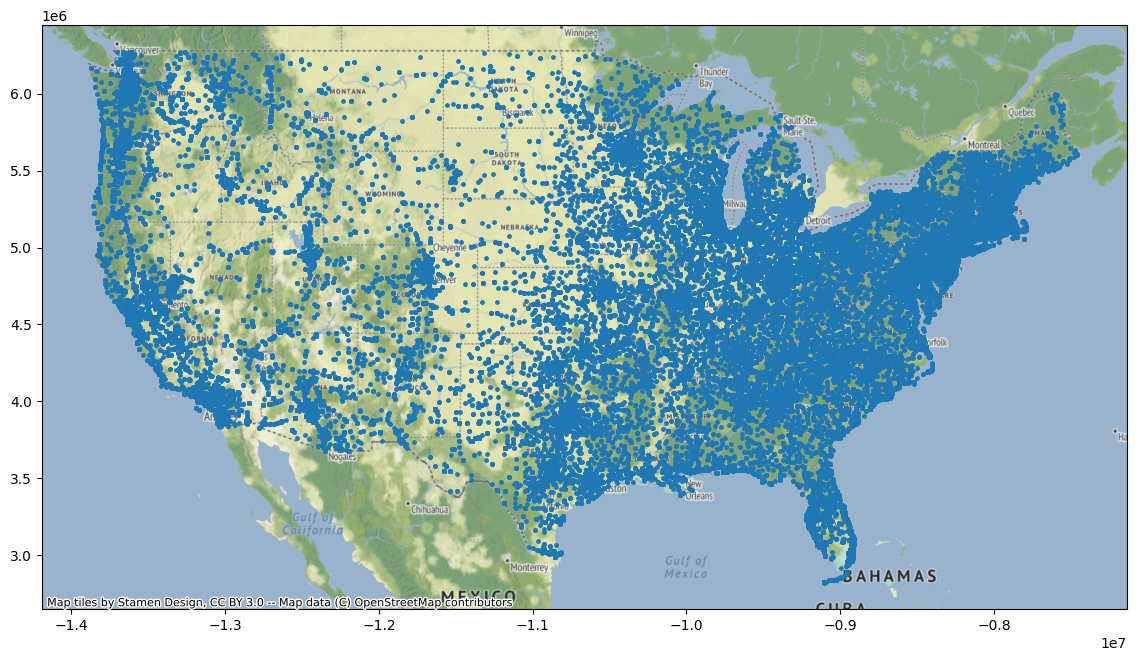

In [5]:
# visualize points on a big map of USA
import contextily as ctx
ax = gdf_us_data.to_crs(3857).plot(markersize=6, figsize=(14,18))
ctx.add_basemap(ax=ax)

In [26]:
import datetime
# save spatially filtered data
today_as_string = datetime.datetime.now().strftime("%m%d%y")
gdf_us_data.to_file(f"data/us_reports_clean_{today_as_string}.geojson", driver="GeoJSON")

In [2]:
# load data for analysis
import geopandas as gpd
gdf_us_data = gpd.read_file("data/us_reports_clean_092723.geojson")

In [7]:
# combine similar shapes into single categories
gdf_us_data["Shape"].replace(["orb", "sphere"], "orb/sphere", inplace=True)
gdf_us_data["Shape"].replace(["light", "flash", "fireball"], "light/flash/fireball", inplace=True)
gdf_us_data["Shape"].replace(["triangle", "delta", "chevron"], "triangle/delta/chevron", inplace=True)
gdf_us_data["Shape"].replace(["cylinder", "cigar"], "cylinder/cigar", inplace=True)
gdf_us_data["Shape"].replace(["oval", "egg"], "oval/egg", inplace=True)

gdf_us_data["Shape"].unique()

array(['cone', 'triangle/delta/chevron', 'cylinder/cigar', 'cross',
       'light/flash/fireball', 'disk', 'rectangle', 'orb/sphere',
       'circle', 'unknown', 'diamond', 'oval/egg', 'other', 'teardrop',
       'formation', 'changing', 'star', 'cube', 'publisher'], dtype=object)

## Analysis
About spatial autocorrelation: https://pysal.org/esda/notebooks/spatialautocorrelation.html

The standard methods for measuring spatial autocorrelation are Moran's I and Geary's C - however these assume continuous interval data, whereas our data is discrete and nominal.

With nominal data we need to adapt these methods. For each shape, treat it as a binary value (is the shape/is not the shape) and do a join count analysis of the shape with all remaining shapes. This will tell us which, if any reports are spatially autocorrelated by shape.

We can extend this analyses by identifying hotspots using LISA methods: https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1538-4632.1995.tb00338.x

In [8]:
import libpysal as lps
import esda
import seaborn as sbn
import matplotlib.pyplot as plt
import json
import datetime

# how many neighbors should each point look for when determining spatial weights, i.e. "closeness"?
# this is an important parameter as it defines which points are associated with each other
# NOTE may need to increase K only for points that are highly coincident with other points (occupy the same location)
# lps.weights.w_union()
k = 200

# use KNN to get spatial weights matrix. Need to use something like KNN instead of Queen/Rook because we are using points.
gdf_us_data.reset_index(drop=True, inplace=True)
binary_sw = lps.weights.distance.KNN.from_dataframe(gdf_us_data, k=k)

### Global autocorrelation (Moran's I)

In [ ]:
shapes = gdf_us_data['Shape']
results = []

i=0
for shape in gdf_us_data['Shape'].unique():
    is_the_shape = shape == shapes
    if sum(is_the_shape) <= 1:
        # not enough samples to do stats on
        continue
    jc = esda.join_counts.Join_Counts(y=is_the_shape, w=binary_sw)

    # # black-black join -> join between two positives (same shape)
    # # white-white join -> join between two negatives (some other shape we are not testing for)
    # # black-white join -> join between positive and negative
    # print(jc.bb)
    # print(jc.ww)
    # print(jc.bw)
    # # mean_bb is the average number of b-b joins from the synthetic realization
    # print(jc.mean_bb)
    result = {
        "shape": shape,
        "bb": jc.bb,
        "ww": jc.ww,
        "bw": jc.bw,
        "mean_bb": jc.mean_bb
    }
    results.append(result)

    # make a new figure so we can plot all in the same loop
    plt.figure(i)
    sbn.kdeplot(jc.sim_bb, fill=True)
    plt.axvline(jc.bb, color='r')
    plt.axvline(jc.mean_bb)
    plt.xlabel('BB Counts')
    plt.title(shape)
    plt.savefig(f"data/k{k}/figures/sauto_global/{shape}.png", bbox_inches="tight")
    plt.show()
    print(f"p-value: {jc.p_sim_bb}")
    i+=1

today_as_string = datetime.datetime.now().strftime("%m%d%y")
with open(f"data/k{k}/sauto_global_{today_as_string}.json", "w") as f:
    json.dump(results, f)

## Local autocorrelations

Determining "hotspots" or "coldspots" for each category.

Each category will have a separate Moran scatterplot.

Moran scatterplot quadrant interpretation:

Q1: "hotspot" - high values surrounded by high values

Q2: "doughnut" - low values surrounded by high values

Q3: "coldspot" - low values surrounded by low values

Q4: "diamond" - high values surrounded by low values

### Local Moran's I

In [ ]:
# calculate local moran and generate figures for all shapes

import matplotlib.pyplot as plt
from matplotlib import colors
import contextily as ctx
import esda
import numpy as np
import time

xmin, ymin, xmax, ymax = gdf_us_data.to_crs(3857).total_bounds

hotspot_labels = np.zeros(gdf_us_data.shape[0])

shapes = gdf_us_data['Shape']

for shape in gdf_us_data['Shape'].unique():
    is_the_shape = shape == shapes
    if sum(is_the_shape) <= 1:
        # not enough samples to do stats on
        continue

    # transformation="b" is important as it specifies "binary" for our observations
    li = esda.moran.Moran_Local(y=is_the_shape, w=binary_sw, transform="b")

    # get only sigificant points and label them
    # a signficant point is one that shows a statistically signficant difference compared to CSR (complete spatial randomness)
    # running all quadrants here even though we only care about hotspots
    # only accepting results with p < 0.01 to get only the strongest signals
    sig = 1 * (li.p_sim < 0.01)
    hotspot = 1 * (sig * li.q==1)
    coldspot = 3 * (sig * li.q==3)
    doughnut = 2 * (sig * li.q==2)
    diamond = 4 * (sig * li.q==4)
    spots = hotspot + coldspot + doughnut + diamond
    spot_labels = [ 'NS', 'hotspot', 'doughnut', 'coldspot', 'diamond']
    labels = [spot_labels[i] for i in spots]

    # add these hotspots to the list of hotspots for all shapes
    hotspot_labels = hotspot_labels + hotspot

    # assign labels and remove NS (not signficant) and non-hotspot results
    df = gdf_us_data.copy().assign(cl=labels)
    df = df.loc[df["cl"] == "hotspot"]

    if df.empty:
        continue

    hmap = colors.ListedColormap(['red'])
    f, ax = plt.subplots(1, figsize=(14, 16))
    df.to_crs(3857).plot(column='cl', categorical=True, \
            cmap=hmap, ax=ax, markersize=30, \
            linewidth=0.5, edgecolor='white', legend=True, \
            legend_kwds={'loc': 'lower left'})
    ax.get_legend().set_title(shape)
    ax.set_xlim(xmin-2000, xmax+2000)
    ax.set_ylim(ymin-2000, ymax+2000)
    ax.set_axis_off()
    while True:
        try:
            ctx.add_basemap(ax=ax, alpha=0.6)
            break
        except Exception as e:
            print(e)
            print("error from basemap request, waiting 1 minute and trying again")
            time.sleep(60)
            continue
    plt.savefig(f"data/k{k}/figures/lmi/{shape}.png", bbox_inches="tight")
    plt.show()

# label the hotspots and save the results
gdf_hotspots_labeled = gdf_us_data.copy()
gdf_hotspots_labeled["hotspot"] = hotspot_labels
import datetime
today_as_string = datetime.datetime.now().strftime("%m%d%y")
gdf_hotspots_labeled.to_file(f"data/k{k}/lmi_hotspots_{today_as_string}.geojson", driver="GeoJSON")

### Getis-Ord Gi

Different LISA stat, interpret similarly to hot-hot joins of Local Moran's I

In [ ]:
# calculate getis-ord gi for all shapes and plot figures

import matplotlib.pyplot as plt
import contextily as ctx
import esda
import numpy as np

xmin, ymin, xmax, ymax = gdf_us_data.to_crs(3857).total_bounds

hotspot_labels = np.zeros(gdf_us_data.shape[0])

shapes = gdf_us_data['Shape']

for shape in gdf_us_data['Shape'].unique():
    is_the_shape = shape == shapes
    if sum(is_the_shape) <= 1:
        # not enough samples to do stats on
        continue

    # transformation="b" is important as it specifies "binary" for our observations
    # star=True uses the feature itself as part of the local summary
    gl = esda.getisord.G_Local(y=is_the_shape, w=binary_sw, transform="b", star=False)

    is_hotspot = (gl.Zs > 0) & (gl.p_sim <= 0.001)

    # plot HH clusters (hotspot clusters)
    hh = gdf_us_data.loc[is_hotspot, "geometry"]
    if hh.shape[0] == 0:
        # no hotspots for this shape
        continue

    # add these hotspots to the list of hotspots for all shapes
    hotspot_labels = hotspot_labels + (1 * (is_hotspot))

    f, ax = plt.subplots(1, figsize=(14, 16))
    hh.to_crs(3857).plot(color="red", ax=ax, markersize=32, \
                linewidth=0.5, edgecolor='white')
    ax.set_xlim(xmin-10000, xmax+10000)
    ax.set_ylim(ymin-10000, ymax+200000)
    ax.set_axis_off()
    ax.set_title(f"{shape.title()}", 
                y = 0.96,
                backgroundcolor='white', 
                fontsize=20,
                bbox=dict(boxstyle='round,pad=0.3', edgecolor='none', facecolor='white', alpha=0.9))
    f.tight_layout()
    ctx.add_basemap(ax=ax, alpha=0.6, source=ctx.providers.OpenStreetMap.Mapnik)
    plt.savefig(f"data/k{k}/figures/gog/{shape.replace('/', '-')}.png", bbox_inches="tight")


# label the hotspots and save the results
gdf_hotspots_labeled = gdf_us_data.copy()
gdf_hotspots_labeled["hotspot"] = hotspot_labels
import datetime
today_as_string = datetime.datetime.now().strftime("%m%d%y")
gdf_hotspots_labeled.to_file(f"data/k{k}/gog_hotspots_{today_as_string}.geojson", driver="GeoJSON")

In [17]:
gdf_us_data.groupby(['Shape'])['Shape'].count()

Shape
changing                   3361
circle                    12124
cone                        473
cross                       425
cube                         22
cylinder/cigar             5267
diamond                    1768
disk                       7181
formation                  4174
light/flash/fireball      34219
orb/sphere                11461
other                      8458
oval/egg                   6423
publisher                     1
rectangle                  2236
star                        134
teardrop                   1050
triangle/delta/chevron    12884
unknown                    8588
Name: Shape, dtype: int64

In [ ]:
# NOTE this is an extract for NUFROC, not related to the main analysis

import pandas as pd
import geopandas as gpd
from timezonefinder import TimezoneFinder

tf = TimezoneFinder()

# assign timezones to each row
df_places = pd.read_json("data/geocodedplaces_092623.json")
df_places["longitude"] = df_places["places"].apply(lambda x: x["longitude"])
df_places["latitude"] = df_places["places"].apply(lambda x: x["latitude"])
# remove non-us points
gdf_places = gpd.GeoDataFrame(df_places, geometry=gpd.points_from_xy(df_places.longitude, df_places.latitude), crs="EPSG:4326")
gdf_us_places = gdf_places.sjoin(us_states, how='inner')
# drop extra state fields from sjoin
gdf_us_places = gdf_us_places.drop(columns=['index_right', 'REGION', 'DIVISION',
       'STATEFP', 'STATENS', 'GEOID', 'STUSPS', 'NAME', 'LSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON'])
df_places = gdf_us_places[["Location", "longitude", "latitude"]]

df_places["timezone"] = df_places.apply(lambda x: tf.timezone_at(lng=x["longitude"], lat=x["latitude"]), axis=1)

df_places

In [21]:
df_places.to_csv("data/nufroc_places_timezone_092723.csv", index=False)